In [1]:
from sklearn import datasets, manifold, mixture, metrics
from skimage.transform import rescale
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from collections import OrderedDict
import gc

In [2]:
n_class = 10 # n primeiros digitos
class_percent = 0.1 # porcentagem dos dados de cada classa que serão usados
n_neighbors = 5
n_components = 10 # dimensao
label_colors = [list( mcolors.TABLEAU_COLORS )[i] 
                  for i in range( 10 )]

# Carregando os dados

In [3]:
datasetOriginal = pd.read_csv("data\\mnist_train.csv")
df = datasetOriginal.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# separar os rotulos dos dados
label, x = df.iloc[:, :1], df.iloc[:, 1:]
label = label.to_numpy().transpose()[0]
x = x.to_numpy()
label, x

(array([5, 0, 4, ..., 5, 6, 8], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [5]:
# sort de acordo com os labels
idx = np.argsort(label)
label = label[idx]
x = x[idx]
label, x

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [6]:
unique, counts = np.unique(label, return_counts=True)
num_data = dict(zip(unique, counts))
num_data

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

# Selecionando dados para analise

In [7]:
# selecionando apenas parte dos dados
x_cut = np.empty((0, 784))
label_cut = np.empty((1, 0), dtype=np.uint8)
for i in range(n_class):
    if i > 0:
        start = sum([num_data[j] for j in range(i)])
        end = int(num_data[i] * class_percent) + start
    else:
        start = 0
        end = int(num_data[i] * class_percent)
    label_cut = np.append(label_cut, label[start : end])
    x_cut = np.vstack((x_cut, x[start : end, :]))
    
unique, counts = np.unique(label_cut, return_counts=True)
num_data_cut = dict(zip(unique, counts))
num_data_cut

{0: 592,
 1: 674,
 2: 595,
 3: 613,
 4: 584,
 5: 542,
 6: 591,
 7: 626,
 8: 585,
 9: 594}

In [8]:
colors = [label_colors[v] for v in label_cut]

# Dimensionality Reduction

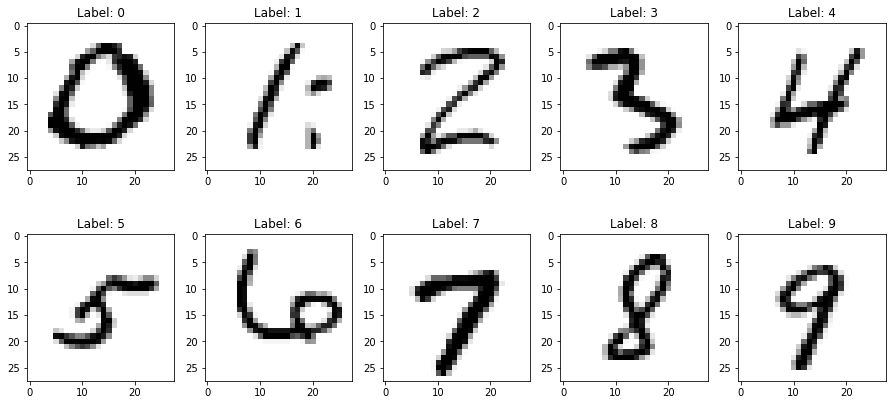

In [131]:
# plot iage of the digits
# https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
num_row = 2
num_col = 5
idx = 0
fig, axes = plt.subplots(num_row, num_col, figsize=(2.5 * num_col, 3*num_row))
for i in range(n_class):
    ax = axes[i // num_col, i % num_col]
    idx += num_data_cut[i] - 1
    ax.imshow(x_cut[idx].reshape((28, 28)), cmap='gray_r')
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.show()

In [9]:
import random
c = list(zip(x_cut, label_cut))
random.seed(42)
random.shuffle(c)
x_cut, label_cut = zip(*c)

In [15]:
np.savetxt('small_mnist.csv', x_cut, delimiter=',')
np.savetxt('small_mnist_labels.csv', label_cut, delimiter=',')

In [134]:
def ManifoldMethod(method, n_neighbors, n_components=2):
    if method == 'ISOMAP':
        return manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
    elif method == 'LLE':
        return manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
    elif method == 'SE':
        return manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
    elif method == 'LTSA':
        return manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='ltsa', eigen_solver='dense', random_state=42)
    
def gmm_predict(x_transformed, n_components=2):
    gmm = mixture.GaussianMixture(n_components=n_components, n_init=5, random_state=42).fit(x_transformed)
    return gmm.predict(x_transformed)

In [136]:
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']

x_transformed = OrderedDict()
for m in methods:
    x_transformed[m] = ManifoldMethod(m, n_neighbors, n_components)

In [138]:
x_transformed['ISOMAP'] = x_transformed['ISOMAP'].fit_transform(x_cut)

In [139]:
x_transformed['LLE'] = x_transformed['LLE'].fit_transform(x_cut)

In [140]:
x_transformed['SE'] = x_transformed['SE'].fit_transform(x_cut)

In [ ]:
def gmm_predict(x_transformed, n_components=2):
    gmm = mixture.GaussianMixture(n_components=n_components, n_init=5, random_state=42).fit(x_transformed)
    return gmm.predict(x_transformed)

for m in methods:
    print(f'{m}')